#Install Library

In [1]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.0 MB/s 


In [2]:
pip install PyStemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 559 kB 5.2 MB/s 
  Created wheel for PyStemmer: filename=PyStemmer-2.0.1-cp37-cp37m-linux_x86_64.whl size=425198 sha256=f8d5225c7bacb4196c4269e3a55c02ef236c2a72070bae693338ee1e5aab3d00
  Stored in directory: /root/.cache/pip/wheels/30/6d/40/0d17a498c5009922dbb3ddaca3d3652387ba94cc96142001f0
Successfully built PyStemmer


In [3]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#import library

In [5]:
import pandas as pd 
import numpy as np 

#import nltk for natural language toolkit
from nltk.corpus import stopwords


#import re, unicode
import re, unicodedata

#import sklearn preprocessing 
from spacy.lang.id.stop_words import STOP_WORDS
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter

#import sklearn for modeling
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import sklearn for model evaluation 
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_auc_score
#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#textblob
from textblob import Word
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

#Load Dataset

In [6]:
df = pd.read_excel('/content/data 1k sentiment uuciptakerja oke.xlsx')
#menampilkan 5 data teratas
df.head()

,Unnamed: 0,text,label
0,0,ayo cek fakta uu cipta kerja uu cipta kerja;,neutral
1,1,poin uu cipta kerja mesti uu ciptakerja lawan ...,neutral
2,2,simak fakta jelas uu cipta kerja uu cipta kerj...,neutral
3,3,amdal uuciptakerja;,neutral
4,4,bang hotman paris coba lbh jakarta opini bang ...,neutral


In [7]:
df.shape

(2937, 3)

In [8]:
df['label'].value_counts()

neutral     2230
negative     378
positive     329
Name: label, dtype: int64

In [9]:
import pandas as pd

In [10]:
data = pd.read_excel('/content/data 1k sentiment uuciptakerja oke.xlsx')
data.head()

,Unnamed: 0,text,label
0,0,ayo cek fakta uu cipta kerja uu cipta kerja;,neutral
1,1,poin uu cipta kerja mesti uu ciptakerja lawan ...,neutral
2,2,simak fakta jelas uu cipta kerja uu cipta kerj...,neutral
3,3,amdal uuciptakerja;,neutral
4,4,bang hotman paris coba lbh jakarta opini bang ...,neutral


* Insight
dapat kita lihat diatas memiliki 500 data dan terdapat 3 kolom ,selanjutnya akan menghapus fitur label dikarenakan tidak dipakai

In [12]:
#hapus variabel label
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(3)

,text,label
0,ayo cek fakta uu cipta kerja uu cipta kerja;,neutral
1,poin uu cipta kerja mesti uu ciptakerja lawan ...,neutral
2,simak fakta jelas uu cipta kerja uu cipta kerj...,neutral


* insight
sudah menghapus kolom label , data tersebut masih kotor sebelum melakukan treatment check terlebih dahulu tipe data pada dataset ini

In [13]:
#check tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2937 non-null   object
 1   label   2937 non-null   object
dtypes: object(2)
memory usage: 46.0+ KB


#Cleaning Data

* Catatan
pada tahap ini, akan melakukan pembersihan data yang kotor, seperti menghilangkan tanda baca,nomor, menyamakan huruf besar ke huruf kecil semua dll

In [14]:
#membuat function cleaning
def cleaning(text):
  
    text = text.replace('\n', ' ') # replace new line into space
    text = text.strip(' ') # remove characters space from both left and right text
    text = re.compile('rt @').sub('@',text,) #remove retweet (rt)
    text = re.sub(r"(?:\@|http|www.)\S+"," ",text) #remove url
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    text = text.replace("\n"," ") #remove \n
    text = text.replace("_"," ")
    text= text.replace("<a","")
    text = text.replace("</a>","")
    text = text.replace("br />",'') 
    text = text.replace("&quot",'')
    text = re.sub(r'[^\w\s]','',text)
    rpt_regex = re.compile(r"(.)\1{1,}",re.IGNORECASE)
    text = rpt_regex.sub(r"\1\1",text) #remove repeated word
    text = text.strip() #trim head and tail
    text = re.sub(' +',' ',text)#remove multiple space
    text = re.sub(r'[~^0-9]', '', text) #remove digits
    return text


In [438]:
df = df.drop_duplicates(subset=['text'], keep='first')

In [15]:
#menerapkan function tersebut ke data pada kolom teks
df['text'] = df['text'].apply(cleaning)

In [16]:
#menampilkan data hasil cleaning
df.head(3)

,text,label
0,ayo cek fakta uu cipta kerja uu cipta kerja,neutral
1,poin uu cipta kerja mesti uu ciptakerja lawan ...,neutral
2,simak fakta jelas uu cipta kerja uu cipta kerj...,neutral


In [17]:
#melakukan lowercase 
df['text'] = df['text'].str.lower()
df.head(3)

,text,label
0,ayo cek fakta uu cipta kerja uu cipta kerja,neutral
1,poin uu cipta kerja mesti uu ciptakerja lawan ...,neutral
2,simak fakta jelas uu cipta kerja uu cipta kerj...,neutral


# Visualisasi Data

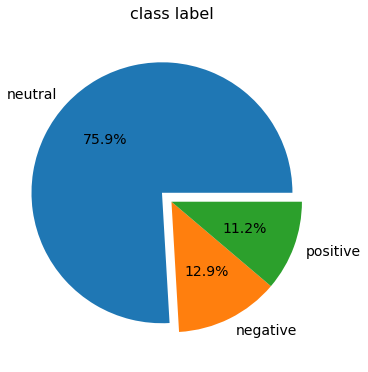

In [18]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df['label'].value_counts()]
labels = list(df['label'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('class label', fontsize = 16, pad = 20)
plt.show()

* insight

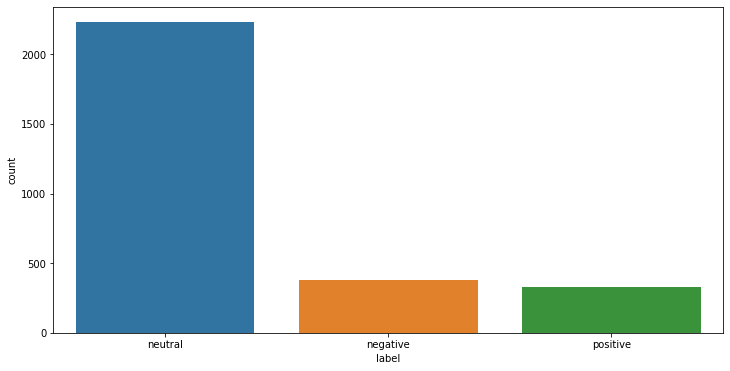

In [19]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'label', data = df)
plt.show()

In [20]:
STOP_WORDS.update(['yg','jg','teh','mah','da','atuh','jd','km','ak','lg','ya','ga','ngga','nggak','gak','tp',
                   'kalo','nya','pake','liat','udh','aja','wkwk','wkwkwk','wk','gt','gais','blm','sih','tau',
                   'tahu','gt','udah','utk','rb','rp','dgn','ayo','isi','biar','yah','dr','bawa','gitu','eh',
                   'pas','td','sm','pengen','pgn','dpt','sd','byr','min','dscn','sy','no'])


In [21]:
def remove_stopwords(sentence):
  words = sentence.split()
  words = [word for word in words if word not in STOP_WORDS and word.isalpha()]
  return " ".join(words)

In [22]:
df['text'] = df['text'].apply(remove_stopwords)


In [23]:
df.head(3)

,text,label
0,cek fakta uu cipta kerja uu cipta kerja,neutral
1,poin uu cipta kerja mesti uu ciptakerja lawan ...,neutral
2,simak fakta uu cipta kerja uu cipta kerja lawa...,neutral


#Lemmatizer

In [24]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [25]:
%%time
def lemmatizer(sentence):
  output = stemmer.stem(sentence)
  return output

df['text'] = df['text'].apply(lemmatizer)

CPU times: user 7min 56s, sys: 1.55 s, total: 7min 57s
Wall time: 8min 1s


In [26]:
df.head(3)

,text,label
0,cek fakta uu cipta kerja uu cipta kerja,neutral
1,poin uu cipta kerja mesti uu ciptakerja lawan ...,neutral
2,simak fakta uu cipta kerja uu cipta kerja lawa...,neutral


In [27]:
#check data text di baris 24
df['text'][24]

'beda sikap demo kerja dukung uu cipta kerja sejahtera buruh uu cipta kerja omnibuslaw cipta kerja'

In [28]:
#label encoding
from sklearn import preprocessing
def label_encoder(data):
    le = preprocessing.LabelEncoder()
    data = le.fit_transform(data)
    return data

In [29]:
df['label'] = label_encoder(df['label'])
df.head(3)

,text,label
0,cek fakta uu cipta kerja uu cipta kerja,1
1,poin uu cipta kerja mesti uu ciptakerja lawan ...,1
2,simak fakta uu cipta kerja uu cipta kerja lawa...,1


In [30]:
df['label'].value_counts()

1    2230
0     378
2     329
Name: label, dtype: int64

#Analysis Class Label

In [31]:
#subset 3 class positif, negatif, netral
positif = df[df['label'] == 2].reset_index().drop('index',axis = 1)
negatif = df[df['label'] == 0].reset_index().drop('index',axis = 1)
netral = df[df['label'] == 1 ].reset_index().drop('index',axis = 1)

In [32]:
negatif.head(3)

,text,label
0,emang bener ump umk umsp hapus omnibuslaw uu c...,0
1,mnrt bunyi mikir dukung uuciptakerja,0
2,dalak urus izin,0


In [33]:
netral.head(3)

,text,label
0,cek fakta uu cipta kerja uu cipta kerja,1
1,poin uu cipta kerja mesti uu ciptakerja lawan ...,1
2,simak fakta uu cipta kerja uu cipta kerja lawa...,1


In [34]:
positif.head(3)

,text,label
0,putar uu cipta kerja rakyat sejahtera uuciptak...,2
1,hipmi dukung uuciptakerja positif manfaat masy...,2
2,jadwal tanding tgl november yuk mampir ayobosk...,2


In [35]:
def word_frequency(sentence):
  sentence = " ".join(sentence)
  new_tokens = word_tokenize(sentence)
  counted = Counter(new_tokens)
  word_freq = pd.DataFrame(counted.items(), columns = ['Kata','Frekuensi']).sort_values(by = 'Frekuensi',ascending = False)
  return word_freq

* catatan
membuat function word_frequency dengan tujuan ingin melihat frekuensi untuk setiap kata yang sering muncul 

In [36]:
#membuat variabel 10 kata paling banyak muncul (frekuensi)
top_10_kata_positif = word_frequency(positif['text'])[:10]
top_10_kata_negatif = word_frequency(negatif['text'])[:10]
top_10_kata_netral = word_frequency(netral['text'])[:20]

In [37]:
#mengurutkan frekuensi kata negatif paling banyak muncul
top_10_kata_netral.sort_values(by=['Frekuensi'], ascending=False)

,Kata,Frekuensi
13,uuciptakerja,1876
4,kerja,1499
2,uu,1384
3,cipta,1278
27,omnibuslaw,585
24,omnibus,396
25,law,383
105,demo,376
80,indonesia,253
53,tolak,252


In [38]:
#mengurutkan frekuensi kata positif paling banyak muncul
top_10_kata_negatif.sort_values(by=['Frekuensi'], ascending=False)

,Kata,Frekuensi
17,uuciptakerja,391
7,uu,135
9,kerja,125
6,omnibuslaw,113
23,demo,107
8,cipta,103
25,omnibus,60
26,law,56
57,tolak,54
54,hoax,52


In [39]:
#mengurutkan frekuensi kata positif paling banyak muncul
top_10_kata_positif.sort_values(by=['Frekuensi'], ascending=False)

,Kata,Frekuensi
6,uuciptakerja,352
1,uu,242
3,kerja,224
2,cipta,180
79,omnibuslaw,156
80,umkm,76
138,indonesia,65
40,omnibus,64
9,ciptakerja,61
10,omnibuslawbangunbangsa,52


In [40]:
#mengurutkan frekuensi kata positif paling banyak muncul
top_10_kata_netral.sort_values(by=['Frekuensi'], ascending=False)

,Kata,Frekuensi
13,uuciptakerja,1876
4,kerja,1499
2,uu,1384
3,cipta,1278
27,omnibuslaw,585
24,omnibus,396
25,law,383
105,demo,376
80,indonesia,253
53,tolak,252


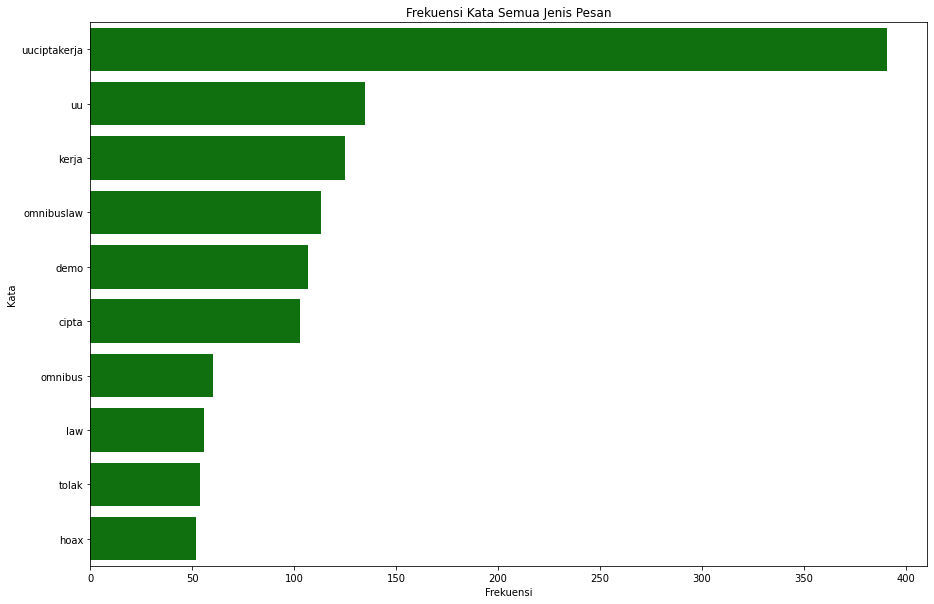

In [41]:
#visualisasi kata negatif
plt.figure(figsize = (15,10))
sns.barplot(x = 'Frekuensi', y = 'Kata', data = top_10_kata_negatif, color = 'green')
plt.title("Frekuensi Kata Semua Jenis Pesan")
plt.show()

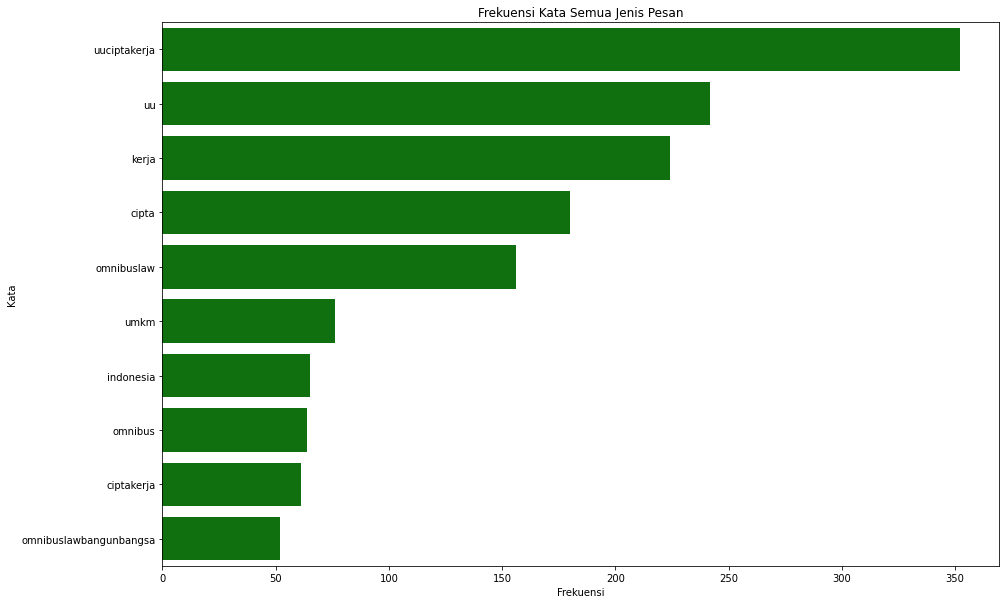

In [42]:
#visualisasi kata positif
plt.figure(figsize = (15,10))
sns.barplot(x = 'Frekuensi', y = 'Kata', data = top_10_kata_positif, color = 'green')
plt.title("Frekuensi Kata Semua Jenis Pesan")
plt.show()

#TF IDF

In [483]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [527]:
#Membuat object TF-IDF
tfidf = TfidfVectorizer(max_features=2500,max_df=0.80, min_df=3)

In [528]:
#Membuat variabel x dan y
x_df = df['text']
y_df = df['label']
#convert variabel ke array
x = np.array(x_df)
y = np.array(y_df)

In [529]:
#tfidf vectorizer
x_tfidf = tfidf.fit_transform(x)

In [530]:
#train test split using tfidfvectorizer 
train_x_tfidf, test_x_tfidf, train_y, test_y = train_test_split(x_tfidf, y, test_size=0.30)                                                                

In [531]:
#hasil pembobotan
print(train_x_tfidf)

  (0, 418)	0.23692285470283841
  (0, 894)	0.2484981633759568
  (0, 387)	0.2561747417195829
  (0, 767)	0.23692285470283841
  (0, 955)	0.22465253304564362
  (0, 1026)	0.21307722437252521
  (0, 212)	0.2422259421702906
  (0, 1438)	0.20080690271533044
  (0, 342)	0.13916684250541178
  (0, 968)	0.16359067085994042
  (0, 1256)	0.16728012865925568
  (0, 941)	0.1572214059435922
  (0, 952)	0.17528279449291975
  (0, 507)	0.16417875308839694
  (0, 1083)	0.13460895325722957
  (0, 472)	0.37371620633207636
  (0, 1534)	0.16860344459925655
  (0, 1047)	0.45679850241703446
  (0, 1567)	0.11876946515523994
  (1, 318)	0.4500809112221658
  (1, 1142)	0.4500809112221658
  (1, 62)	0.46398476197514027
  (1, 97)	0.3053752629375431
  (1, 598)	0.24755333845175778
  (1, 1141)	0.25417193796339144
  :	:
  (1760, 974)	0.10097009452803546
  (1760, 683)	0.0758289184196637
  (1760, 248)	0.0804767692760209
  (1760, 1567)	0.07705593719698314
  (1761, 1306)	0.6732524902401523
  (1761, 576)	0.5479151529721181
  (1761, 240)	0.4

#Model SVM

##SVM library

In [462]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

##SVM Linear Biasa

In [423]:
#svm kernel linear
svm = (SVC(C=1, kernel='linear'))
model_svmlinear = svm.fit(train_x_tfidf,train_y)

svm_prediction =  model_svmlinear.predict(test_x_tfidf)
svm_acc_linear = accuracy_score(svm_prediction,test_y)
svm_acc_linear

0.873015873015873

In [424]:
print(classification_report(test_y, svm.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.87      0.41      0.56       109
           1       0.87      0.99      0.93       686
           2       0.86      0.56      0.68        87

    accuracy                           0.87       882
   macro avg       0.87      0.65      0.72       882
weighted avg       0.87      0.87      0.86       882



##smote


In [536]:
from imblearn.over_sampling import SMOTE
sme = SMOTE(random_state=42)
X_smotee, y_smotee = sme.fit_resample(train_x_tfidf,train_y)
print('Resampled dataset shape %s',(y_smotee))

Resampled dataset shape %s [1 2 1 ... 2 2 2]


In [426]:
print(X_smotee.shape, y_smotee.shape )

(4632, 1689) (4632,)


In [429]:
from sklearn.svm import SVC
svm = (SVC(C=10,random_state=40 ,kernel='rbf',gamma=1.))
model_svmlinear = svm.fit(X_smotee, y_smotee)

svm_prediction =  model_svmlinear.predict(test_x_tfidf)
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
svm_acc_linear = accuracy_score(svm_prediction,test_y)
svm_acc_linear

0.8798185941043084

In [428]:
print(classification_report(test_y, svm.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.84      0.48      0.61       109
           1       0.88      0.98      0.93       686
           2       0.91      0.59      0.71        87

    accuracy                           0.88       882
   macro avg       0.88      0.68      0.75       882
weighted avg       0.88      0.88      0.87       882



##Hyperparameter

In [539]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [540]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_smotee, y_smotee)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [543]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [549]:
encoder.fit(test_y)

LabelEncoder()

In [551]:
#akurasi training data
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(test_x_tfidf)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.9091352269181845 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [550]:
print(confusion_matrix(test_y,Y_pred_label))
print("\n")
print(classification_report(test_y,Y_pred_label))


svm_model.score

[[ 71  32   9]
 [ 66 448  41]
 [ 18  28  44]]


              precision    recall  f1-score   support

           0       0.46      0.63      0.53       112
           1       0.88      0.81      0.84       555
           2       0.47      0.49      0.48        90

    accuracy                           0.74       757
   macro avg       0.60      0.64      0.62       757
weighted avg       0.77      0.74      0.75       757



<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

##SVM Linear One VS Rest Classifier

In [155]:
#SVM OAR 
from sklearn.svm import SVC
svm = OneVsRestClassifier(SVC(C=100, kernel='linear',gamma=1), n_jobs=-1)
model_svmlinearoar = svm.fit(train_x_tfidf,train_y)
svm_prediction =  model_svmlinearoar.predict(test_x_tfidf)

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
svm_acc_linearoar = accuracy_score(svm_prediction,test_y)
svm_acc_linearoar

0.8095238095238095

In [156]:
print(classification_report(test_y, svm.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58       112
           1       0.89      0.88      0.89       674
           2       0.54      0.53      0.54        96

    accuracy                           0.81       882
   macro avg       0.67      0.67      0.67       882
weighted avg       0.81      0.81      0.81       882



##SVM Linear One vs One Classifier

In [54]:
svm = OneVsOneClassifier(SVC(C=1, kernel='linear'), n_jobs=-1)
model_svmlinearoao = svm.fit(train_x_tfidf,train_y)
svm_prediction =  model_svmlinearoao.predict(test_x_tfidf)

svm_acc_linearoao = accuracy_score(svm_prediction,test_y)
svm_acc_linearoao

0.8514739229024944

In [55]:
print(classification_report(test_y, svm.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.79      0.47      0.59       112
           1       0.86      0.98      0.91       674
           2       0.83      0.41      0.55        96

    accuracy                           0.85       882
   macro avg       0.83      0.62      0.68       882
weighted avg       0.85      0.85      0.83       882



##SVM RBF Biasa

In [332]:
svmrbf = SVC(C=10, kernel='rbf',gamma=1,  random_state=34)
model_svmrbf = svm.fit(train_x_tfidf,train_y)
svm_prediction =  model_svmrbf.predict(test_x_tfidf)

svm_acc_rbf = accuracy_score(svm_prediction,test_y)
svm_acc_rbf

0.8356009070294784

In [329]:
print(classification_report(test_y, svm.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.89      0.27      0.41       116
           1       0.84      0.99      0.90       669
           2       0.81      0.47      0.60        97

    accuracy                           0.84       882
   macro avg       0.84      0.58      0.64       882
weighted avg       0.84      0.84      0.81       882



##SVM RBF One VS Rest Classifier

In [254]:
svmrbf = OneVsRestClassifier(SVC(C=10, kernel='rbf'))
model_svmrbfoar = svm.fit(X_smotee, y_smotee)
svm_prediction =  model_svmrbfoar.predict(test_x_tfidf)

svm_acc_rbfoar = accuracy_score(svm_prediction,test_y)
svm_acc_rbfoar


0.8786848072562359

In [255]:
print(classification_report(test_y, svm.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.75      0.58      0.65        99
           1       0.90      0.96      0.93       685
           2       0.82      0.60      0.69        98

    accuracy                           0.88       882
   macro avg       0.82      0.71      0.76       882
weighted avg       0.87      0.88      0.87       882



##SVN RBF One vs One Classifier

In [260]:
from sklearn.svm import SVC
svmrbf = OneVsOneClassifier(SVC(C=1, kernel='rbf'))
model_svmrbfoao = svm.fit(train_x_tfidf,train_y)
svm_prediction =  model_svmrbfoao.predict(test_x_tfidf)

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
svm_acc_rbf = accuracy_score(svm_prediction,test_y)
svm_acc_rbf

0.8526077097505669

In [261]:
print(classification_report(test_y, svm.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.94      0.32      0.48        99
           1       0.85      1.00      0.91       685
           2       0.93      0.39      0.55        98

    accuracy                           0.85       882
   macro avg       0.90      0.57      0.65       882
weighted avg       0.86      0.85      0.82       882



##SVM Polynomial Biasa

In [311]:
from sklearn.svm import SVC
svm = SVC(C=1, kernel='poly',random_state=42)
model_svmpoly = svm.fit(train_x_tfidf,train_y)
svm_prediction =  model_svmpoly.predict(test_x_tfidf)

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
svm_acc_poly = accuracy_score(svm_prediction,test_y)
svm_acc_poly

0.8356009070294784

In [257]:
print(classification_report(test_y, svm.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64        99
           1       0.90      0.94      0.92       685
           2       0.78      0.57      0.66        98

    accuracy                           0.86       882
   macro avg       0.78      0.71      0.74       882
weighted avg       0.86      0.86      0.86       882



##SVM Polynomial One Vs Rest Classifier

In [64]:
svm = OneVsRestClassifier(SVC(C=10, kernel='poly',random_state=42))
model_svmpolyoar = svm.fit(train_x_tfidf,train_y)

In [65]:
svm_prediction =  model_svmpolyoar.predict(test_x_tfidf)

In [66]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
svm_acc_poly = accuracy_score(svm_prediction,test_y)
svm_acc_poly

0.8526077097505669

In [67]:
print(classification_report(test_y, svm.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.82      0.41      0.55       112
           1       0.86      0.97      0.91       674
           2       0.83      0.52      0.64        96

    accuracy                           0.85       882
   macro avg       0.84      0.63      0.70       882
weighted avg       0.85      0.85      0.84       882



##SVM Polynomial One Vs One Classifier

In [68]:
svm = OneVsOneClassifier(SVC(C=10, kernel='poly',gamma='auto'))
model_svmpolyoao = svm.fit(train_x_tfidf,train_y)

In [69]:
svm_prediction =  model_svmpolyoao.predict(test_x_tfidf)

In [70]:
svm_acc_poly = accuracy_score(svm_prediction,test_y)
svm_acc_poly

0.764172335600907

In [71]:
print(classification_report(test_y, svm.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.76      1.00      0.87       674
           2       0.00      0.00      0.00        96

    accuracy                           0.76       882
   macro avg       0.25      0.33      0.29       882
weighted avg       0.58      0.76      0.66       882



#Kfold

In [72]:
from sklearn.model_selection import cross_val_score

##crossval svm linear biasa

In [73]:
scores = cross_val_score(model_svmlinear, test_x_tfidf, test_y, cv=5)

In [74]:
print(scores)

[0.83615819 0.81920904 0.81818182 0.81818182 0.8125    ]


In [75]:
from sklearn.metrics import multilabel_confusion_matrix
y_preds = model_svmlinear.predict(test_x_tfidf)
multilabel_confusion_matrix(test_y, y_preds )

array([[[756,  14],
        [ 59,  53]],

       [[ 99, 109],
        [ 15, 659]],

       [[778,   8],
        [ 57,  39]]])

##crossval svm Linear One vs Rest Classifier

In [76]:
scores = cross_val_score(model_svmlinearoar, test_x_tfidf, test_y, cv=5)

In [77]:
print(scores)

[0.84180791 0.83050847 0.80681818 0.8125     0.81818182]


In [78]:
from sklearn.metrics import multilabel_confusion_matrix
y_preds = model_svmlinearoar.predict(test_x_tfidf)
multilabel_confusion_matrix(test_y, y_preds )

array([[[753,  17],
        [ 56,  56]],

       [[104, 104],
        [ 20, 654]],

       [[777,   9],
        [ 54,  42]]])

##crossval svm linear One Vs One Classifier

In [79]:
scores = cross_val_score(model_svmlinearoao, test_x_tfidf, test_y, cv=5)

In [80]:
print(scores)

[0.83615819 0.81920904 0.81818182 0.8125     0.8125    ]


In [81]:
from sklearn.metrics import multilabel_confusion_matrix
y_preds = model_svmlinearoao.predict(test_x_tfidf)
multilabel_confusion_matrix(test_y, y_preds )

array([[[756,  14],
        [ 59,  53]],

       [[ 99, 109],
        [ 15, 659]],

       [[778,   8],
        [ 57,  39]]])

##crossval svm rbf biasa

In [82]:
scores = cross_val_score(model_svmrbf, test_x_tfidf, test_y, cv=5)

In [83]:
print(scores)

[0.83615819 0.81920904 0.81818182 0.8125     0.8125    ]


In [84]:
from sklearn.metrics import multilabel_confusion_matrix
y_preds = model_svmrbf.predict(test_x_tfidf)
multilabel_confusion_matrix(test_y, y_preds )

array([[[756,  14],
        [ 59,  53]],

       [[ 99, 109],
        [ 15, 659]],

       [[778,   8],
        [ 57,  39]]])

##crossval svm rbf One VS Rest Classifier

In [85]:
scores = cross_val_score(model_svmrbfoar, test_x_tfidf, test_y, cv=5)

In [86]:
print(scores)

[0.83615819 0.81920904 0.81818182 0.8125     0.8125    ]


In [87]:
from sklearn.metrics import multilabel_confusion_matrix
y_preds = model_svmrbfoar.predict(test_x_tfidf)
multilabel_confusion_matrix(test_y, y_preds )

array([[[756,  14],
        [ 59,  53]],

       [[ 99, 109],
        [ 15, 659]],

       [[778,   8],
        [ 57,  39]]])

##crossval svm rbf One Vs One Classifier

In [88]:
scores = cross_val_score(model_svmrbfoao, test_x_tfidf, test_y, cv=5)

In [89]:
print(scores)

[0.83615819 0.81920904 0.81818182 0.8125     0.8125    ]


In [90]:
from sklearn.metrics import multilabel_confusion_matrix
y_preds = model_svmrbfoao.predict(test_x_tfidf)
multilabel_confusion_matrix(test_y, y_preds )

array([[[756,  14],
        [ 59,  53]],

       [[ 99, 109],
        [ 15, 659]],

       [[778,   8],
        [ 57,  39]]])

##crossval svm poly biasa

In [91]:
scores = cross_val_score(model_svmpoly, test_x_tfidf, test_y, cv=5)

In [92]:
print(scores)

[0.84180791 0.81920904 0.80681818 0.8125     0.81818182]


In [93]:
from sklearn.metrics import multilabel_confusion_matrix
y_preds = model_svmpoly.predict(test_x_tfidf)
multilabel_confusion_matrix(test_y, y_preds )

array([[[765,   5],
        [ 68,  44]],

       [[ 86, 122],
        [  7, 667]],

       [[782,   4],
        [ 56,  40]]])

##crossval svm poly One vs Rest Classifier

In [94]:
scores = cross_val_score(model_svmpolyoar , test_x_tfidf, test_y, cv=5)
print(scores)

[0.84745763 0.81920904 0.80113636 0.81818182 0.84090909]


In [95]:
from sklearn.metrics import multilabel_confusion_matrix
y_preds = model_svmpolyoar.predict(test_x_tfidf)
multilabel_confusion_matrix(test_y, y_preds )

array([[[760,  10],
        [ 66,  46]],

       [[ 98, 110],
        [ 18, 656]],

       [[776,  10],
        [ 46,  50]]])

##crossval svm One vs One Classifier

In [96]:
scores = cross_val_score(model_svmpolyoao , test_x_tfidf, test_y, cv=5)
print(scores)

[0.76271186 0.76271186 0.76704545 0.76704545 0.76136364]


In [97]:
from sklearn.metrics import multilabel_confusion_matrix
y_preds = model_svmpolyoao.predict(test_x_tfidf)
multilabel_confusion_matrix(test_y, y_preds )

array([[[770,   0],
        [112,   0]],

       [[  0, 208],
        [  0, 674]],

       [[786,   0],
        [ 96,   0]]])